# WEEK 3 (Gap Minder)

## Multiple lenear regression ----

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sp
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [3]:
data = pd.read_csv("gapminder.csv")

In [4]:
data.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


### Converting data

In [6]:
data1 = data.iloc[: , [0,1,2,9,14]].copy()

In [8]:
data1.columns = ["country" , "income" , "alcohol" ,"life" ,"employment"]

In [9]:
def fun1(a):
    
    for i in range(len(a)):
        if a[i] ==" ":
            a[i] = np.nan
        else :
            a[i] = float(a[i])
            
    x = np.mean(a.dropna())
    for i in range(len(a)):
        if np.isnan(a[i]):
            a[i] = x
    
        
    

In [11]:
for i in data1.columns[1:]:
    fun1(data1[i])

In [12]:
data1

,country,income,alcohol,life,employment
0,Afghanistan,8740.97,0.03,48.673,55.7
1,Albania,1915,7.29,76.918,51.4
2,Algeria,2231.99,0.69,73.131,50.5
3,Andorra,21943.3,10.17,69.7535,58.636
4,Angola,1381,5.57,51.093,75.7
...,...,...,...,...,...
208,Vietnam,722.808,3.91,75.181,71
209,West Bank and Gaza,8740.97,6.68941,72.832,32
210,"Yemen, Rep.",610.357,0.2,65.493,39
211,Zambia,432.226,3.56,49.025,61


## MULTIPLE LENEAR REGRESSION

### Outliers removal

In [63]:
data2 = data1.iloc[:,1:].copy()

def fun2(a):
    
    mean = np.mean(a)
    std = np.std(a)
    mx = mean + 4*std
    mn = mean - 4*std
    
    for i in range(len(a)):
        if (a[i]>mx)|(a[i]<mn):
            a[i] = np.nan
        

for i in data2.columns:
    fun2(data2[i])

len(data2)

data2 = data2.dropna()

len(data2)

data2.head()

,income,alcohol,life,employment
0,8740.97,0.03,48.673,55.7
1,1915,7.29,76.918,51.4
2,2231.99,0.69,73.131,50.5
3,21943.3,10.17,69.7535,58.636
4,1381,5.57,51.093,75.7


###  Centering 

In [64]:
def fun2(a):
    
    x = np.mean(a)
    # print(x)
    for i in range(len(a)):
        # print(i)
        a.iloc[i] = a.iloc[i]-x
    

In [65]:
fun2(data2["income"])
fun2(data2["alcohol"])
fun2(data2["employment"])

In [66]:
data2.head()

,income,alcohol,life,employment
0,1063.11,-6.65941,48.673,-2.93595
1,-5762.86,0.600588,76.918,-7.23595
2,-5445.86,-5.99941,73.131,-8.13596
3,14265.5,3.48059,69.7535,3.55271e-14
4,-6296.85,-1.11941,51.093,17.064


In [69]:
for i in data2.columns:
    data2[i] = pd.to_numeric(data2[i])

### Modeling--

In [72]:
model = sp.ols(formula = "life ~ income+ alcohol +employment" , data = data2).fit()

In [74]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     51.66
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           6.15e-25
Time:                        16:45:51   Log-Likelihood:                -705.91
No. Observations:                 210   AIC:                             1420.
Df Residuals:                     206   BIC:                             1433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.7535      0.486    143.507      0.0

### All p values are significant and this model explains 43% of the variablity of the income variable and  the total p value is very low as well showing all these variable are confounding

In [76]:
model.resid

0     -20.797905
1       7.775571
2       5.202666
3      -7.845013
4     -10.433763
         ...    
208    13.045172
209    -5.038820
210    -4.800100
211   -15.734262
212   -12.011430
Length: 210, dtype: float64

Text(0.5, 0, 'index')

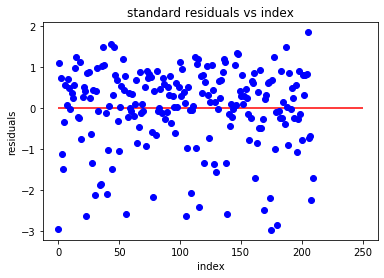

In [135]:
plt.figure()
plt.plot(model.resid_pearson , "bo" )
plt.hlines(y=0 ,xmin = 0,xmax =250, colors = "r")
plt.title("standard residuals vs index" )
plt.ylabel("residuals")
plt.xlabel("index")

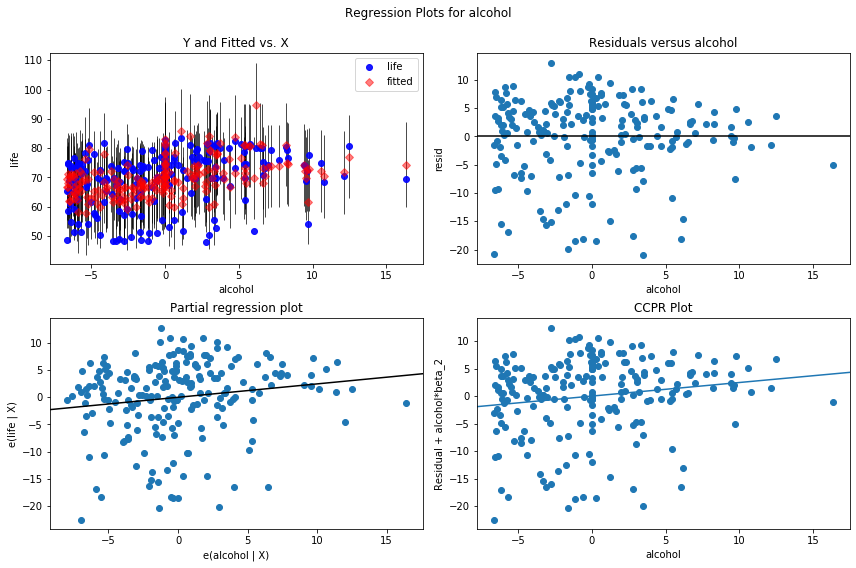

In [141]:
import statsmodels.api as sm
fig3 = plt.figure(figsize  = (12,8))
fig3 = sm.graphics.plot_regress_exog(model,"alcohol",fig = fig3)

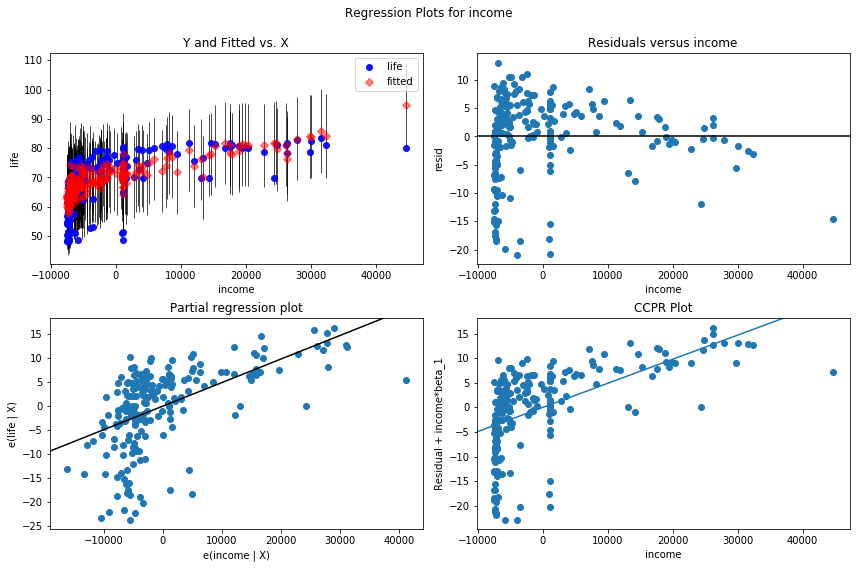

In [142]:
import statsmodels.api as sm
fig3 = plt.figure(figsize  = (12,8))
fig3 = sm.graphics.plot_regress_exog(model,"income",fig = fig3)

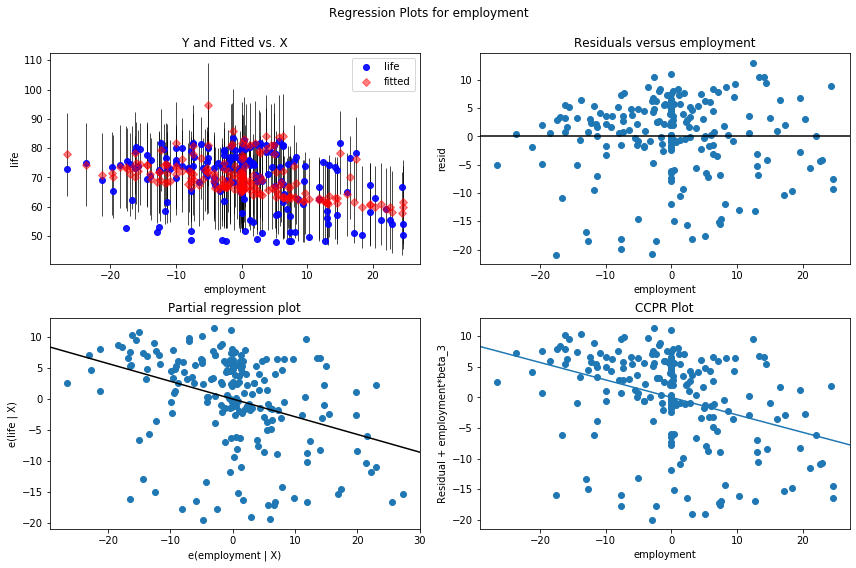

In [143]:
import statsmodels.api as sm
fig3 = plt.figure(figsize  = (12,8))
fig3 = sm.graphics.plot_regress_exog(model,"employment",fig = fig3)

# SUMMARY -

As it can be seen in various diagnostic plot in -
1) alcohol - in case of alcohol as the vaue of alcohol increases residue decreases and the partial regression plots have points very far away from the line
2) income - in case of income partial regression plot shows that the points lie near the line although residuals decrese as income increses even after removing outliers one of the outliers can be seen at the end
3) employment - in case of employment residuals increases as valye increses and while partial regression shows that the line follows the general trend the points are still pretty far from the points